In [1]:
%matplotlib  inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Read CSV file

In [2]:
import os
os.listdir()

['data_20-01-07.csv',
 '.ipynb_checkpoints',
 'thrust_simulation.py',
 'bench_calibration.ipynb',
 'data_20-01-07.png']

In [3]:
csv_file = 'data_20-01-07.csv'
with open(csv_file, encoding='cp1252') as F:
    data = F.readlines()
    
DATA = []
for line in data:
    try:
        values = [float(x.replace(',','.')) for x in line.split(';')[:2]]
        DATA.append(values)
    except: pass
DATA = np.array(DATA)

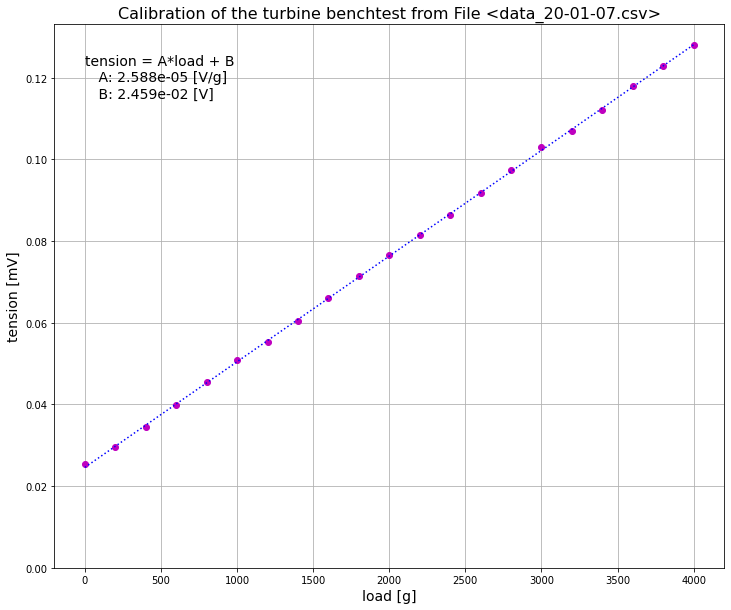

In [4]:
load, measure = DATA[:,0], DATA[:,1]*1e3

plt.figure(figsize=(12,10))
plt.plot(load, measure, 'om')
plt.grid()
plt.xlabel("load [g]", fontsize=14)
plt.ylabel("tension [mV]", fontsize=14)
plt.title(f'Calibration of the turbine benchtest from File <{csv_file}>',  fontsize=16)
ylim = plt.ylim()
plt.ylim(0, ylim[1])
slope, intercept, r_value, p_value, std_err = stats.linregress(load, measure)

y = slope*load + intercept
plt.plot(load, y, ":b");
label = f"   A: {slope:.3e} [V/g]\n   B: {intercept:.3e} [V]"
max_measure = measure.max()
plt.text(0,.9*max_measure,"tension = A*load + B\n"+label, fontsize=14)
plt.savefig(csv_file.replace('.csv', '.png'))

In [5]:
def f(x): return slope*x+intercept

In [6]:
f(0)

0.024593073593073576